In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from thinning import sample_hawkes_process_thinning, sample_hawkes_process_thinning_vectorised, sample_hawkes_process_thinning_true_vectorised
from utils import exp_kernel, constant_background, plot_counting_process, exp_kernel_vectorised
from time_rescaling import rescale_times, rescale_times_true_vectorised
from clustering import simulate_homogeneous_poisson_process, simulate_inhomogeneous_poisson_process, simulate_immigrants, simulate_offspring, produce_cluster, sample_hawkes_process_clustering, cluster_plot

In [4]:
from utils import conditional_intensity, conditional_intensity_vectorised, conditional_intensity_true_vectorised

In [5]:
import statsmodels.api as sm
import scipy

In [6]:
np.random.SeedSequence()

SeedSequence(
    entropy=218515563977266353658504509642512996210,
)

In [7]:
master_seed = 87443734680457430769386590886457729679

1000.3361496538715


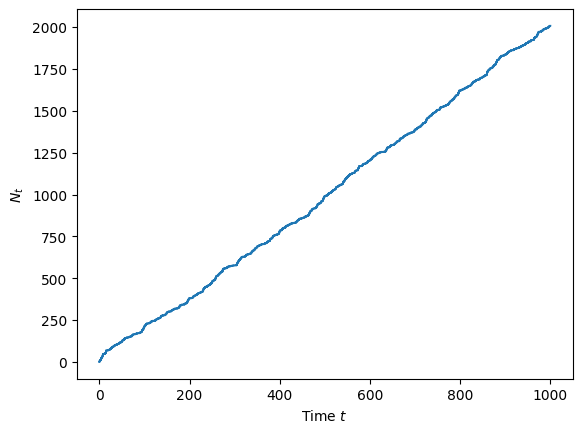

In [8]:
max_T = 1000

hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised, seed=master_seed)
plot_counting_process(hawkes_realisation)

In [10]:
len(hawkes_realisation)

2007

In [10]:
max_T = 1000

seed_seq_master = np.random.SeedSequence(master_seed)

num_samples = 100
num_events = np.zeros(num_samples)
for i in range(num_samples):
    child_seed = seed_seq_master.spawn(1)[0]
    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised, seed=child_seed)
    num_events[i] = len(hawkes_realisation)

print(np.mean(num_events))

1995.52


In [7]:
def zero_kernel(t):

    return np.zeros_like(t)

In [8]:
max_T = 1000

seed_seq_master = np.random.SeedSequence(master_seed)

num_samples = 100
num_events = np.zeros(num_samples)
for i in range(num_samples):
    child_seed = seed_seq_master.spawn(1)[0]
    hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, zero_kernel, seed=child_seed)
    num_events[i] = len(hawkes_realisation)

print(np.mean(num_events))

1000.2


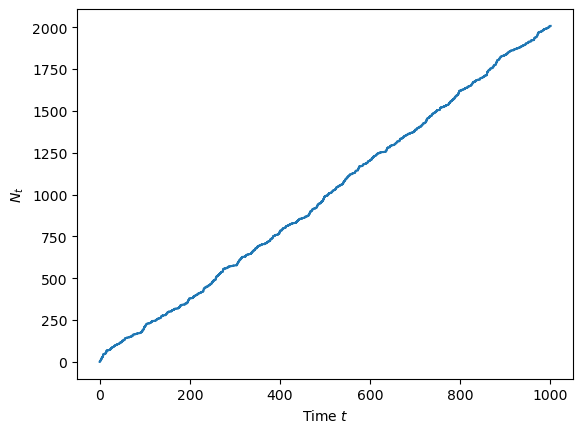

In [9]:
max_T = 1000

hawkes_realisation = sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised, seed=master_seed)
plot_counting_process(hawkes_realisation)

In [10]:
taus = rescale_times_true_vectorised(hawkes_realisation)

c:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\utils.py:40: RuntimeWarning: overflow encountered in exp
  return np.where(t < 0, 0, alpha * np.exp(-delta * t))


Text(0, 0.5, 'Density')

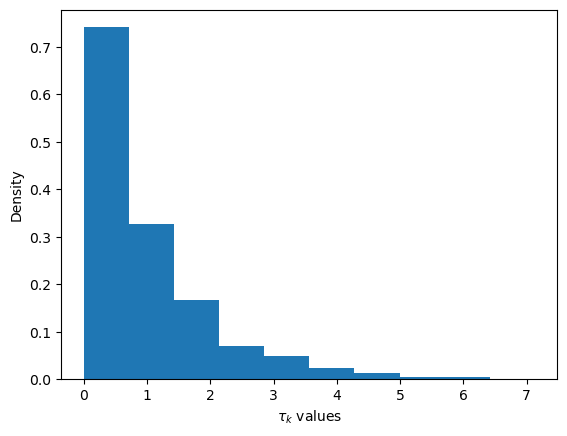

In [20]:
plt.hist(taus, density=True)
plt.xlabel(r"$\tau_k$ values")
plt.ylabel("Density")

In [11]:
z = [(1 - np.exp(-tau)) for tau in taus]

Text(0, 0.5, 'Density')

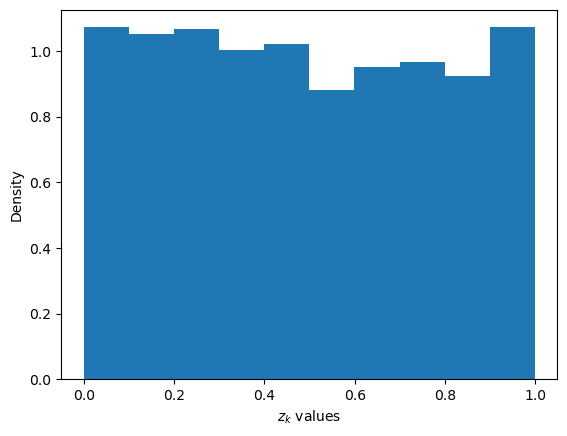

In [17]:
plt.hist(z, density=True)
plt.xlabel("$z_k$ values")
plt.ylabel("Density")

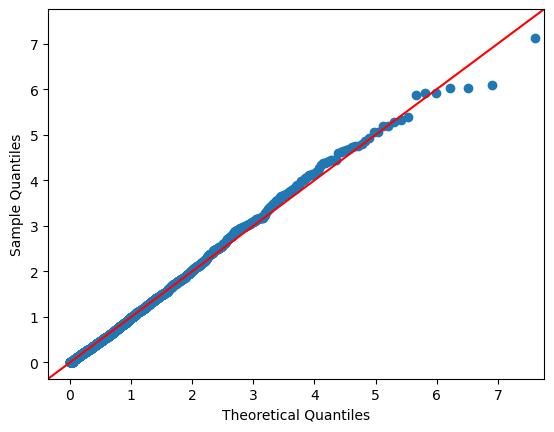

In [21]:
sm.qqplot(np.array(taus), line='45', dist=scipy.stats.distributions.expon)
plt.show()

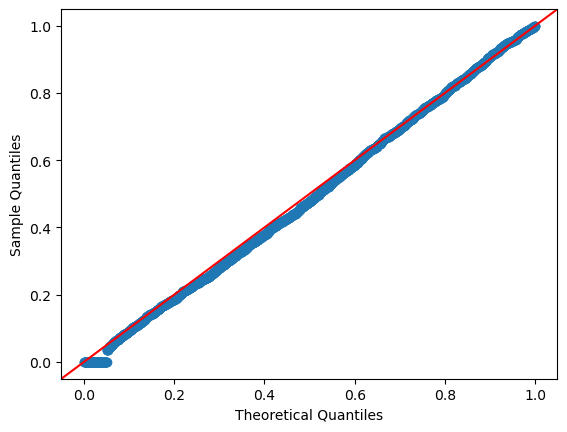

: 

In [22]:
sm.qqplot(np.array(z), line='45', dist=scipy.stats.distributions.uniform)
plt.show()